In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num = pd.read_csv('numerical.csv')
cat = pd.read_csv('categorical.csv')

# Checking data.

In [3]:
num.shape

(9134, 8)

In [4]:
num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [5]:
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
cat.shape

(9134, 14)

In [7]:
cat.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
cat

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,C,3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,P,3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,P,3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,C,2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,P,1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,P,1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,C,3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,C,2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,P,2,Offer3,Branch,Four-Door Car,Large


Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

In [9]:
data = pd.concat([num, cat], axis=1)

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
state                             object
response                          object
coverage                          object
education                         object
employment_status                 object
gender                            object
location_code                     object
marital_status                    object
policy_type                       object
policy                             int64
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
dtype: object

In [12]:
data['policy'] = data['policy'].astype(str)

In [13]:
data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
state                             object
response                          object
coverage                          object
education                         object
employment_status                 object
gender                            object
location_code                     object
marital_status                    object
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
dtype: object

In [14]:
data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
state                            0
response                         0
coverage                         0
education                        0
employment_status                0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [15]:
X = data.drop('total_claim_amount', axis=1)
y = data['total_claim_amount']

# 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
8973,2866.595388,26924,73,12,80,0,1,California,No,Basic,...,Disabled,F,Urban,Married,P,2,Offer1,Call Center,Four-Door Car,Medsize
4996,8502.237137,12843,111,6,47,0,3,Nevada,No,Premium,...,Medical Leave,F,Suburban,Single,C,2,Offer2,Branch,Four-Door Car,Small
8184,12010.937260,0,119,3,24,0,2,Washington,No,Premium,...,Unemployed,M,Suburban,Single,C,2,Offer2,Agent,Four-Door Car,Medsize
3543,7957.630101,51125,67,3,67,0,2,California,No,Basic,...,Employed,M,Suburban,Divorced,P,3,Offer1,Agent,Four-Door Car,Medsize
8978,5639.402141,24636,77,5,72,0,6,California,No,Extended,...,Disabled,M,Suburban,Single,P,3,Offer2,Agent,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,24672.655310,0,76,8,77,0,2,Washington,No,Extended,...,Unemployed,M,Suburban,Single,P,1,Offer1,Agent,Two-Door Car,Medsize
5588,7725.535708,96748,96,13,68,0,9,California,No,Extended,...,Employed,M,Suburban,Married,P,3,Offer2,Branch,Two-Door Car,Medsize
6179,2728.842912,40516,70,9,75,0,1,Nevada,No,Basic,...,Employed,F,Suburban,Divorced,P,2,Offer3,Agent,Four-Door Car,Small
8244,8382.478392,25998,71,16,38,0,2,Oregon,Yes,Basic,...,Employed,M,Suburban,Married,P,1,Offer2,Call Center,Four-Door Car,Medsize


In [18]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
3325,36229.408420,22220,105,29,46,0,2,Nevada,No,Basic,...,Employed,F,Rural,Single,P,3,Offer1,Branch,Sports Car,Medsize
817,7082.830426,53310,189,26,33,3,1,California,No,Basic,...,Employed,M,Suburban,Divorced,P,3,Offer2,Branch,Luxury,Medsize
5587,2959.819985,69746,74,17,91,0,1,Oregon,No,Basic,...,Employed,F,Urban,Divorced,P,1,Offer1,Call Center,Four-Door Car,Medsize
576,8608.157233,21450,110,8,80,2,3,Oregon,No,Basic,...,Employed,F,Suburban,Divorced,P,1,Offer1,Call Center,Sports Car,Small
4103,8622.835375,97361,73,6,85,0,2,Arizona,Yes,Basic,...,Employed,M,Suburban,Single,C,2,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,4488.134688,0,66,1,61,0,9,California,No,Basic,...,Unemployed,M,Suburban,Single,C,3,Offer2,Web,Four-Door Car,Small
1344,3460.665040,14262,90,27,9,0,1,Oregon,No,Extended,...,Disabled,F,Urban,Married,P,3,Offer1,Agent,Four-Door Car,Medsize
5781,22029.150500,0,121,27,58,0,2,Washington,No,Extended,...,Unemployed,M,Suburban,Married,P,3,Offer2,Branch,SUV,Large
1246,3331.445625,73695,84,28,84,0,1,Washington,No,Extended,...,Employed,M,Suburban,Married,P,3,Offer3,Call Center,Four-Door Car,Medsize


# 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [19]:
X_train_num = X_train.select_dtypes(include=np.number)
X_train_num.shape

(6850, 7)

In [20]:
X_train_cat = X_train.select_dtypes('object')
X_train_cat.shape

(6850, 14)

In [21]:
X_test_num = X_test.select_dtypes(include=np.number)
X_test_num.shape

(2284, 7)

In [22]:
X_test_cat = X_test.select_dtypes('object')
X_test_cat.shape

(2284, 14)

# 3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_num)

In [24]:
X_train_num_scaled = scaler.transform(X_train_num)

In [25]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_train_num_scaled.index = X_train_num.index
X_train_num_scaled.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,6850.000000,6850.000000,6850.000000,6850.000000,6850.000000,6850.000000,6850.000000
mean,0.074500,0.376943,0.135729,0.428667,0.486599,0.077781,0.248175
std,0.083169,0.305238,0.145465,0.286232,0.282361,0.182613,0.300389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025524,0.000000,0.033755,0.171429,0.252525,0.000000,0.000000
50%,0.047484,0.338124,0.092827,0.400000,0.484848,0.000000,0.125000
75%,0.085943,0.624176,0.202532,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
X_test_num_scaled = scaler.transform(X_test_num)

In [27]:
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)
X_test_num_scaled.index = X_test_num.index
X_test_num_scaled.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000
mean,0.076222,0.375752,0.136597,0.439367,0.482208,0.074168,0.238562
std,0.087948,0.299740,0.144357,0.292398,0.280462,0.180470,0.293820
min,-0.000074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025920,0.105458,0.029536,0.171429,0.242424,0.000000,0.000000
50%,0.048038,0.343640,0.092827,0.400000,0.474747,0.000000,0.125000
75%,0.087759,0.619058,0.202532,0.685714,0.717172,0.000000,0.375000
max,0.787530,0.999790,0.936709,1.000000,1.000000,1.000000,1.000000


# 4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

One-hot.

In [28]:
onehot_cols = ['state', 'marital_status', 'policy', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'response', 'gender']

In [29]:
X_train_cat_one = X_train_cat[onehot_cols]

In [30]:
X_test_cat_one = X_test_cat[onehot_cols]

In [31]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat_one)

In [32]:
X_train_cat_one_encoded = onehotencoder.transform(X_train_cat_one).toarray()
cols = onehotencoder.get_feature_names_out(input_features=X_train_cat_one.columns)
X_train_cat_one_encoded = pd.DataFrame(X_train_cat_one_encoded, columns=cols)

In [33]:
X_train_cat_one_encoded.index = X_train_cat_one.index

In [34]:
X_test_cat_one_encoded = onehotencoder.transform(X_test_cat_one).toarray()
cols2 = onehotencoder.get_feature_names_out(input_features=X_test_cat_one.columns)
X_test_cat_one_encoded = pd.DataFrame(X_test_cat_one_encoded, columns=cols2)

In [35]:
X_test_cat_one_encoded.index = X_test_cat_one.index

Ordinal.

In [36]:
ordinal_cols = ['coverage', 'employment_status', 'location_code', 'vehicle_size', 'education']

In [37]:
X_train_cat_ord_encoded = X_train_cat[ordinal_cols]

In [38]:
X_test_cat_ord_encoded = X_test_cat[ordinal_cols]

In [39]:
for col in X_train_cat_ord_encoded.columns:
    unique_values = X_train_cat_ord_encoded[col].unique()
    print(f"'{col}' unique values: {unique_values}")

'coverage' unique values: ['Basic' 'Premium' 'Extended']
'employment_status' unique values: ['Disabled' 'Medical Leave' 'Unemployed' 'Employed' 'Retired']
'location_code' unique values: ['Urban' 'Suburban' 'Rural']
'vehicle_size' unique values: ['Medsize' 'Small' 'Large']
'education' unique values: ['Post Grad' 'Bachelor' 'High School or Below' 'College']


In [40]:
X_train_cat_ord_encoded['coverage'] = X_train_cat_ord_encoded['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
X_train_cat_ord_encoded['employment_status'] = X_train_cat_ord_encoded['employment_status'].map({"Unemployed" : 0, "Retired" : 0.5, "Disabled" : 0.5, "Medical Leave" : 0.5, "Employed" : 1})
X_train_cat_ord_encoded['location_code'] = X_train_cat_ord_encoded['location_code'].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
X_train_cat_ord_encoded['vehicle_size'] = X_train_cat_ord_encoded['vehicle_size'].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})
X_train_cat_ord_encoded['education'] = X_train_cat_ord_encoded['education'].map({"High School or Below" : 0, "Bachelor" : 0.5, "College" : 0.5, "Post Grad" : 1})

C:\Users\dcast\AppData\Local\Temp\ipykernel_5148\1921150187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ord_encoded['coverage'] = X_train_cat_ord_encoded['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
C:\Users\dcast\AppData\Local\Temp\ipykernel_5148\1921150187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ord_encoded['employment_status'] = X_train_cat_ord_encoded['employment_status'].map({"Unemployed" : 0, "Retired" : 0.5, "Disabled" : 0.5, "Medical Lea

In [41]:
X_train_cat_ord_encoded

,coverage,employment_status,location_code,vehicle_size,education
8973,0.0,0.5,1.0,0.5,1.0
4996,1.0,0.5,0.5,0.0,0.5
8184,1.0,0.0,0.5,0.5,0.0
3543,0.0,1.0,0.5,0.5,0.0
8978,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...
6041,0.5,0.0,0.5,0.5,0.0
5588,0.5,1.0,0.5,0.5,0.5
6179,0.0,1.0,0.5,0.0,0.5
8244,0.0,1.0,0.5,0.5,0.5


In [42]:
X_test_cat_ord_encoded['coverage'] = X_test_cat_ord_encoded['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
X_test_cat_ord_encoded['employment_status'] = X_test_cat_ord_encoded['employment_status'].map({"Unemployed" : 0, "Retired" : 0.5, "Disabled" : 0.5, "Medical Leave" : 0.5, "Employed" : 1})
X_test_cat_ord_encoded['location_code'] = X_test_cat_ord_encoded['location_code'].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
X_test_cat_ord_encoded['vehicle_size'] = X_test_cat_ord_encoded['vehicle_size'].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})
X_test_cat_ord_encoded['education'] = X_test_cat_ord_encoded['education'].map({"High School or Below" : 0, "Bachelor" : 0.5, "College" : 0.5, "Post Grad" : 1})

C:\Users\dcast\AppData\Local\Temp\ipykernel_5148\694795860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ord_encoded['coverage'] = X_test_cat_ord_encoded['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
C:\Users\dcast\AppData\Local\Temp\ipykernel_5148\694795860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ord_encoded['employment_status'] = X_test_cat_ord_encoded['employment_status'].map({"Unemployed" : 0, "Retired" : 0.5, "Disabled" : 0.5, "Medical Leave" : 

Concat.

In [43]:
X_train_cat_encoded = pd.concat([X_train_cat_one_encoded, X_train_cat_ord_encoded], axis=1)

In [44]:
X_test_cat_encoded = pd.concat([X_test_cat_one_encoded, X_test_cat_ord_encoded], axis=1)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [45]:
X_train_transf = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)

In [46]:
X_train_transf

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,response_Yes,gender_M,coverage,employment_status,location_code,vehicle_size,education
8973,0.011822,0.269291,0.050633,0.342857,0.808081,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,1.0
4996,0.081038,0.128454,0.210970,0.171429,0.474747,0.0,0.250,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.0,0.5
8184,0.124131,0.000000,0.244726,0.085714,0.242424,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5,0.0
3543,0.074349,0.511347,0.025316,0.085714,0.676768,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.5,0.0
8978,0.045877,0.246407,0.067511,0.142857,0.727273,0.0,0.625,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,0.279640,0.000000,0.063291,0.228571,0.777778,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.5,0.0,0.5,0.5,0.0
5588,0.071499,0.967664,0.147679,0.371429,0.686869,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.5,0.5,0.5
6179,0.010131,0.405237,0.037975,0.257143,0.757576,0.0,0.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.5
8244,0.079567,0.260029,0.042194,0.457143,0.383838,0.0,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,0.5,0.5


In [47]:
X_test_transf = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [48]:
X_test_transf

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,response_Yes,gender_M,coverage,employment_status,location_code,vehicle_size,education
3325,0.421577,0.222242,0.185654,0.828571,0.464646,0.0,0.125,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5
817,0.063605,0.533201,0.540084,0.742857,0.333333,0.6,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.5,0.5
5587,0.012967,0.697593,0.054852,0.485714,0.919192,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.5
576,0.082339,0.214541,0.206751,0.228571,0.808081,0.4,0.250,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
4103,0.082519,0.973795,0.050633,0.171429,0.858586,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,0.031738,0.000000,0.021097,0.028571,0.616162,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0
1344,0.019119,0.142647,0.122363,0.771429,0.090909,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.5,0.5
5781,0.247173,0.000000,0.253165,0.771429,0.585859,0.0,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.5,1.0,0.0
1246,0.017532,0.737090,0.097046,0.800000,0.848485,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.5,1.0,0.5,0.5,0.5


# 6. Try a simple linear regression with all the data to see whether we are getting good results.

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transf, y_train)

LinearRegression()

In [50]:
score = lr.score(X_test_transf, y_test)
score

0.60645139584021

In [51]:
score_train = lr.score(X_train_transf, y_train)
score_train

0.6361668309920437

# 7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code. 

In [52]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [53]:
def test_models(models, X_train, X_test, y_train, y_test):
    scores = []

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append((model, score))
    
    return scores

# 8. Use the function to check LinearRegressor and KNeighborsRegressor.
# 9. You can check also the MLPRegressor for this task!

We try to identify a good k value for the K Neighbors model.

In [54]:
scores = []
for k in range(2,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_transf, y_train)
    scores.append(model.score(X_test_transf, y_test))

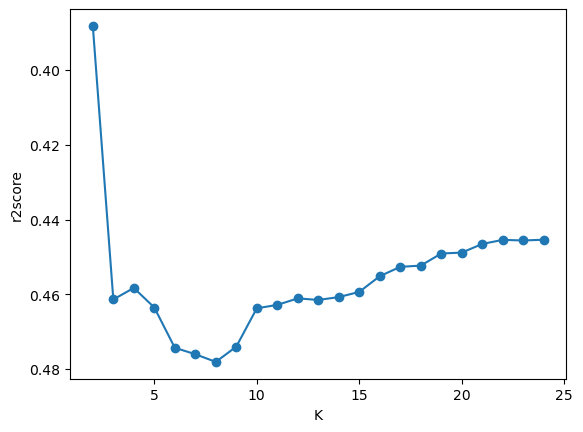

In [55]:
plt.plot(range(2,25),scores,marker='o',)
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('r2score')
plt.show()

We test the models with the function.

In [57]:
models_to_test = (LinearRegression(), KNeighborsRegressor(n_neighbors=8), MLPRegressor())
results = test_models(models_to_test, X_train_transf, X_test_transf, y_train, y_test)
results

c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[(LinearRegression(), 0.60645139584021),
 (KNeighborsRegressor(n_neighbors=8), 0.4781337049909802),
 (MLPRegressor(), 0.6524557389285703)]

# 10. Check and discuss the results.

For this dataset and based on r2 socre, MLPRegressor is the model that seems to perform best. Although the score of the linear regression model is not that far.

MLPRegressor is a model based based on artificial neural networks.

Options for improving our models results could include:
- Feature selection.
- Changing test size.
- Changing models default parameters.